# Regularisation in Python

## Ridge Regression

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import scale
from sklearn import model_selection  # cross_validation
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# plot in a separate (IPython) window:
# %matplotlib qt5  
# plot in the notebook:
%matplotlib inline  

In [9]:
df = pd.read_csv('Hitters.csv').dropna().drop('Player', axis=1)
df.info()
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [11]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [10]:
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [12]:
y = df.Salary
# Drop the column with the independent variable (Salary), and columns for which we created dummy:
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
# Define the feature set X:
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 19 columns):
AtBat          263 non-null float64
Hits           263 non-null float64
HmRun          263 non-null float64
Runs           263 non-null float64
RBI            263 non-null float64
Walks          263 non-null float64
Years          263 non-null float64
CAtBat         263 non-null float64
CHits          263 non-null float64
CHmRun         263 non-null float64
CRuns          263 non-null float64
CRBI           263 non-null float64
CWalks         263 non-null float64
PutOuts        263 non-null float64
Assists        263 non-null float64
Errors         263 non-null float64
League_N       263 non-null uint8
Division_W     263 non-null uint8
NewLeague_N    263 non-null uint8
dtypes: float64(16), uint8(3)
memory usage: 35.7 KB


In [18]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas
#np.linspace(10,-2,100)*0.5

array([  5.00000000e+09,   3.78231664e+09,   2.86118383e+09,
         2.16438064e+09,   1.63727458e+09,   1.23853818e+09,
         9.36908711e+08,   7.08737081e+08,   5.36133611e+08,
         4.05565415e+08,   3.06795364e+08,   2.32079442e+08,
         1.75559587e+08,   1.32804389e+08,   1.00461650e+08,
         7.59955541e+07,   5.74878498e+07,   4.34874501e+07,
         3.28966612e+07,   2.48851178e+07,   1.88246790e+07,
         1.42401793e+07,   1.07721735e+07,   8.14875417e+06,
         6.16423370e+06,   4.66301673e+06,   3.52740116e+06,
         2.66834962e+06,   2.01850863e+06,   1.52692775e+06,
         1.15506485e+06,   8.73764200e+05,   6.60970574e+05,
         5.00000000e+05,   3.78231664e+05,   2.86118383e+05,
         2.16438064e+05,   1.63727458e+05,   1.23853818e+05,
         9.36908711e+04,   7.08737081e+04,   5.36133611e+04,
         4.05565415e+04,   3.06795364e+04,   2.32079442e+04,
         1.75559587e+04,   1.32804389e+04,   1.00461650e+04,
         7.59955541e+03,

## Make a Ridge Regression Model (Regularised Regression)
- Try different values of alpha to compare the affect on the weights

In [19]:
ridge = Ridge(normalize=True)  # normalize=True ensures all variables on same scale
coefs = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
np.shape(coefs)

(100, 19)

In [32]:
coefs

[array([  2.41792033e-10,   8.77087820e-10,   3.53418911e-09,
          1.48322166e-09,   1.56674826e-09,   1.84396625e-09,
          7.54102361e-09,   2.07601888e-11,   7.64034224e-11,
          5.76187223e-10,   1.53282320e-10,   1.58190714e-10,
          1.67364484e-10,   9.68457013e-11,   1.58184041e-11,
         -7.37555427e-11,  -2.57640933e-09,  -3.46788982e-08,
         -5.11835167e-10]),
 array([  3.19634838e-10,   1.15945848e-09,   4.67199001e-09,
          1.96073175e-09,   2.07114900e-09,   2.43761486e-09,
          9.96878940e-09,   2.74437478e-11,   1.01000828e-10,
          7.61685599e-10,   2.02630206e-10,   2.09118814e-10,
          2.21245998e-10,   1.28024318e-10,   2.09109993e-11,
         -9.75004868e-11,  -3.40586150e-09,  -4.58434625e-08,
         -6.76615963e-10]),
 array([  4.22538444e-10,   1.53273587e-09,   6.17609583e-09,
          2.59197198e-09,   2.73793708e-09,   3.22238339e-09,
          1.31781529e-08,   3.62790194e-11,   1.33517150e-10,
          1.00

Text(0,0.5,'weights')

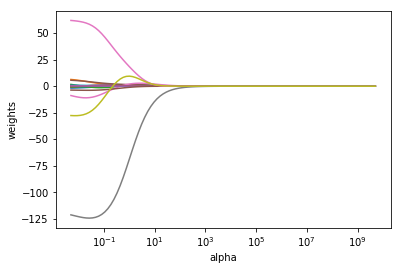

In [30]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [34]:
?model_selection.train_test_split()

In [84]:
# Use the cross-validation package to split data into training and test sets:
X_train, X_test , y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state=1)

# fit a ridge regression model on the training set, and evaluate its MSE on the test set, using lambda = 4:
ridge2 = Ridge(alpha=4, normalize=True)
ridge2.fit(X_train, y_train) # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test) # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index=X.columns)) # Print coefficients

print('MSE: ')
print(mean_squared_error(y_test, pred2)) # Calculate the test MSE

#check for R^2
print('RSqaured:')
print(r2_score(y_test, pred2))

AtBat           0.098658
Hits            0.446094
HmRun           1.412107
Runs            0.660773
RBI             0.843403
Walks           1.008473
Years           2.779882
CAtBat          0.008244
CHits           0.034149
CHmRun          0.268634
CRuns           0.070407
CRBI            0.070060
CWalks          0.082795
PutOuts         0.104747
Assists        -0.003739
Errors          0.268363
League_N        4.241051
Division_W    -30.768885
NewLeague_N     4.123474
dtype: float64
MSE: 
106216.52238
RSqaured:
0.385396297243


In [62]:
#check for R^2
print(r2_score(y_test, pred2))

0.298330917896


In [94]:
# least squares is ridge regression with alpha = 0:
ridge2 = Ridge(alpha=0.0050000000000000001, normalize=True)
ridge2.fit(X_train, y_train) # Fit a ridge regression on the training data
pred = ridge2.predict(X_test) # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index=X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred)) # Calculate the test MSE
#check for R^2
print('RSqaured:')
print(r2_score(y_test, pred2))

AtBat           -2.327649
Hits             6.777092
HmRun           -5.058930
Runs            -1.195967
RBI              3.315572
Walks            4.843869
Years           -2.009342
CAtBat          -0.183766
CHits            0.349997
CHmRun           0.908907
CRuns            0.790424
CRBI             0.444094
CWalks          -0.287937
PutOuts          0.428892
Assists          0.340522
Errors          -3.755124
League_N       102.936007
Division_W    -116.059057
NewLeague_N    -64.664352
dtype: float64
103710.289389
RSqaured:
0.385396297243


In [86]:
# try a huge value of alpha:
ridge3 = Ridge(alpha=10**10, normalize=True)
ridge3.fit(X_train, y_train) # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test) # Use this model to predict the test data
print(pd.Series(ridge3.coef_, index=X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred3)) # Calculate the test MSE
#check for R^2
print('RSqaured:')
print(r2_score(y_test, pred2))

AtBat          1.317464e-10
Hits           4.647486e-10
HmRun          2.079865e-09
Runs           7.726175e-10
RBI            9.390640e-10
Walks          9.769219e-10
Years          3.961442e-09
CAtBat         1.060533e-11
CHits          3.993605e-11
CHmRun         2.959428e-10
CRuns          8.245247e-11
CRBI           7.795451e-11
CWalks         9.894387e-11
PutOuts        7.268991e-11
Assists       -2.615885e-12
Errors         2.084514e-10
League_N      -2.501281e-09
Division_W    -1.549951e-08
NewLeague_N   -2.023196e-09
dtype: float64
172862.235804
RSqaured:
0.385396297243


In [95]:
# use cross-validation to improve the ridge:
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', normalize=True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.57487849769886779

In [89]:
?RidgeCV()

In [96]:
# test MSE?
ridge4 = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

99825.648962927298

In [97]:
# Finally, refit our ridge regression model on the full data set, using the value of alpha chosen by cross-validation, 
# and examine the coefficient estimates:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index=X.columns)

AtBat           0.055838
Hits            0.934879
HmRun           0.369048
Runs            1.092480
RBI             0.878259
Walks           1.717770
Years           0.783515
CAtBat          0.011318
CHits           0.061101
CHmRun          0.428333
CRuns           0.121418
CRBI            0.129351
CWalks          0.041990
PutOuts         0.179957
Assists         0.035737
Errors         -1.597699
League_N       24.774519
Division_W    -85.948661
NewLeague_N     8.336918
dtype: float64

In [100]:
# prepare arrays for plotting:
y_p = ridge4.predict(X)  # predicted response values over the entire data set
y_d = np.array(y)        # actual response values over the entire data set
e = y_d - y_p
print(e)

[ -4.37271692e+01  -1.53011526e+02  -4.34326537e+02  -3.56950551e+02
   1.72454080e+02  -9.90551645e+01  -1.16820438e+01  -7.69357867e+01
   2.45699286e+02  -3.39085791e+02   2.32900481e+02   3.66832792e+01
   4.02737968e+02  -1.73666820e+02  -2.75514627e+02   1.07313917e+02
  -1.47180437e+01  -3.69825381e+02  -2.40421565e+02   6.70788676e+00
  -4.54574979e+02   4.75364404e+01   3.32879236e+02   1.78314818e+02
   2.51159339e+01  -1.47675535e+01  -1.77235289e+02   3.02202504e+01
   9.30163939e+01   1.49162167e+02  -1.08077569e+02  -1.52502201e+02
  -6.63765859e+01  -7.55376689e+00  -1.17600695e+02   1.58792101e+01
   1.51982270e+02   3.12918902e+01  -1.66852555e+02   5.00202379e+02
  -9.41250651e+01   7.06632303e+01   6.44152556e+01   3.49100440e+01
   4.98195968e+02  -2.72481817e+02  -3.30128340e+02   1.11644126e+02
   6.07572004e+01  -2.01971003e+02  -5.17004688e+01  -3.55269504e+02
  -4.14410035e+02   3.89919908e+01  -8.10417956e+02  -2.49848639e+02
   3.05231940e+02  -1.28929648e+02

Text(0,0.5,'predicted')

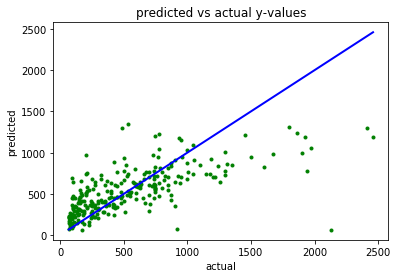

In [101]:
for i in range(y_p.shape[0]):
    plt.plot(y_d[i], y_p[i], 'o', color='green', markersize=3)
y_d12 = [y_d[0], y_d[y_d.shape[0] - 1]]
i1 = y_d.argmin()
i2 = y_d.argmax()
y_d12 = [y_d[i1], y_d[i2]]
plt.plot(y_d12, y_d12, c='blue', linewidth=2)
plt.title('predicted vs actual y-values')
plt.xlabel('actual')
plt.ylabel('predicted')

Text(0.5,0,'index')

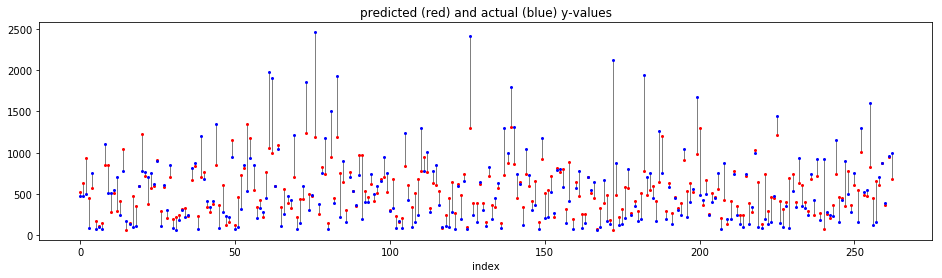

In [111]:
fig = plt.figure(figsize=[16,4])
for i in range(y_p.shape[0]):
    plt.plot([i, i], [y_d[i], y_p[i]], color='grey', linewidth=1)
    plt.plot(i, y_p[i], 'o', color='red', markersize=2)
    plt.plot(i, y_d[i], 'o', color='blue', markersize=2)
plt.title('predicted (red) and actual (blue) y-values')
plt.xlabel('index')

Text(0.5,0,'index')

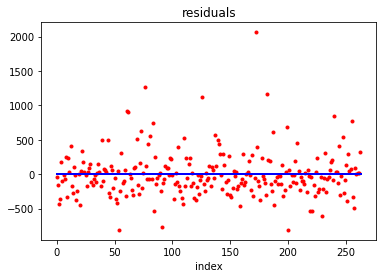

In [112]:
for i in range(y_p.shape[0]):
    plt.plot(i, e[i], 'o', color='red', markersize=3)
plt.plot([0, y_p.shape[0]], [0, 0], c='blue', linewidth=2)
plt.title('residuals')
plt.xlabel('index')

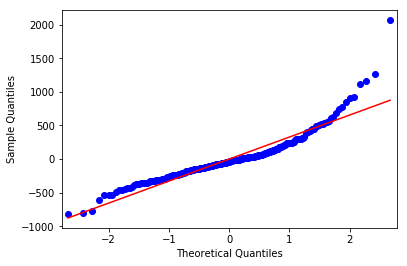

In [113]:
_ = sm.qqplot(e, line='s')    #: bug in statsmodels/IPython interface: suppress double-plot by capturing return value

## LASSO Regression

Text(0,0.5,'weights')

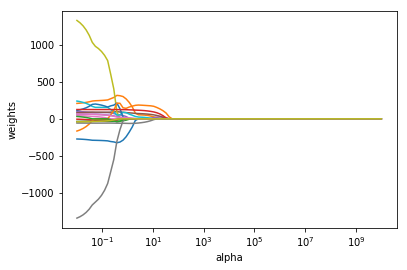

In [114]:
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [118]:
# perform 10-fold cross-validation to choose the best alpha, refit the model, and compute the associated test error:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

104960.65853895503

In [116]:
pd.Series(lasso.coef_, index=X.columns)

AtBat           0.000000
Hits            1.082446
HmRun           0.000000
Runs            0.000000
RBI             0.000000
Walks           2.906388
Years           0.000000
CAtBat          0.000000
CHits           0.000000
CHmRun          0.219367
CRuns           0.000000
CRBI            0.513975
CWalks          0.000000
PutOuts         0.368401
Assists        -0.000000
Errors         -0.000000
League_N        0.000000
Division_W    -89.064338
NewLeague_N     0.000000
dtype: float64